**Question:**
*Temporal changes in serotype distribution*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
import io
import pandas as pd
import seaborn as sns
import math

In [ ]:
data=files.upload()

Saving Pneumococcus_2009-Present_DSH_Casebase_Data.csv to Pneumococcus_2009-Present_DSH_Casebase_Data.csv


In [ ]:
df=pd.read_csv(io.StringIO(data['Pneumococcus_2009-Present_DSH_Casebase_Data.csv'].decode('utf-8')))

In [ ]:
df.drop(df[df['serotype'] == 'ND'].index, inplace = True)
df.drop(df[df['serotype'] == 'NoPCV13'].index, inplace = True)
df.drop(df[df['serotype'] == 'QNS'].index, inplace = True)
df.drop(df[df['serotype'] == 'NTD'].index, inplace = True)
df.drop(df[df['serotype'] == 'NON TYPABLE'].index, inplace = True)
df.drop(df[df['year'] == 2022].index, inplace = True)

In [ ]:
df.drop(columns=['Zila','Address','UniqueID','month','AdmDate','Age (month)','Case Definition','Outcome','Discharge Date','Hospital Duration','organism'],inplace=True)

In [ ]:
df

,year,serotype
0,2009,1
4,2009,2
6,2009,1
8,2009,12
9,2009,14
...,...,...
777,2021,15B
778,2021,6A
779,2021,2
780,2021,1


In [ ]:
df = df.assign(sero_1=df['serotype']=='1')
df.sero_1 = df.sero_1.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_2=df['serotype']=='2')
df.sero_2 = df.sero_2.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_19F=df['serotype']=='19F')
df.sero_19F = df.sero_19F.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_23F=df['serotype']=='23F')
df.sero_23F = df.sero_23F.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_8=df['serotype']=='8')
df.sero_8 = df.sero_8.replace({True: 1, False: 0})

In [ ]:
df

,year,serotype,sero_1,sero_2,sero_19F,sero_23F,sero_8
0,2009,1,1,0,0,0,0
4,2009,2,0,1,0,0,0
6,2009,1,1,0,0,0,0
8,2009,12,0,0,0,0,0
9,2009,14,0,0,0,0,0
...,...,...,...,...,...,...,...
777,2021,15B,0,0,0,0,0
778,2021,6A,0,0,0,0,0
779,2021,2,0,1,0,0,0
780,2021,1,1,0,0,0,0


In [ ]:
by_comp = df.groupby("year")
df1=by_comp.sum()
df1.reset_index()

,year,sero_1,sero_2,sero_19F,sero_23F,sero_8
0,2009,3,1,0,1,0
1,2010,4,4,1,1,4
2,2011,2,14,4,6,1
3,2012,5,3,1,1,2
4,2013,3,0,7,2,3
5,2014,3,1,3,3,4
6,2015,4,4,10,4,2
7,2016,2,2,2,1,1
8,2017,6,9,1,5,2
9,2018,7,3,1,2,6


In [ ]:
col_list= list(df1.reset_index())
col_list.remove('year')
df1['Sum_Top_5'] = df1[col_list].sum(axis=1)
df1.reset_index()

,year,sero_1,sero_2,sero_19F,sero_23F,sero_8,Sum_Top_5
0,2009,3,1,0,1,0,5
1,2010,4,4,1,1,4,14
2,2011,2,14,4,6,1,27
3,2012,5,3,1,1,2,12
4,2013,3,0,7,2,3,15
5,2014,3,1,3,3,4,14
6,2015,4,4,10,4,2,24
7,2016,2,2,2,1,1,8
8,2017,6,9,1,5,2,23
9,2018,7,3,1,2,6,19


In [ ]:
df1.drop(columns=['sero_1','sero_2','sero_19F','sero_23F','sero_8'],inplace=True)
df1

,Sum_Top_5
year,
2009,5
2010,14
2011,27
2012,12
2013,15
2014,14
2015,24
2016,8
2017,23


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
te=pd.DataFrame(df1.reset_index())
te.to_excel("Sum_Top_5.xlsx")

Same file but the edited version uploading

In [ ]:
data=files.upload()

Saving Sum_Top_5.csv to Sum_Top_5.csv


In [ ]:
df1=pd.read_csv(io.StringIO(data['Sum_Top_5.csv'].decode('utf-8')))

In [ ]:
df1

,sero_1,sero_2,sero_19F,sero_23F,sero_8,Sum_Top_5
year,,,,,,
2009,3,1,0,1,0,5
2010,4,4,1,1,4,14
2011,2,14,4,6,1,27
2012,5,3,1,1,2,12
2013,3,0,7,2,3,15
2014,3,1,3,3,4,14
2015,4,4,10,4,2,24
2016,2,2,2,1,1,8
2017,6,9,1,5,2,23


In [ ]:
df2.drop(columns=['sero_1','sero_4','sero_5','sero_6B','sero_7F','sero_9V','sero_14','sero_18C','sero_19F','sero_23F','total','others','Sum_PCV_10'],inplace=True)

In [ ]:
plt.rcParams['figure.figsize'] = [40,20]

In [ ]:
df_year['year'].value_counts().sort_index().plot(kind='bar')

NameError: ignored

In [ ]:
data=files.upload()

Saving Sum_15_serotypes.csv to Sum_15_serotypes.csv


In [ ]:
df1=pd.read_csv(io.StringIO(data['Sum_15_serotypes.csv'].decode('utf-8')))

In [ ]:
data=files.upload()

Saving top_5.csv to top_5 (1).csv


In [ ]:
df3=pd.read_csv(io.StringIO(data['top_5.csv'].decode('utf-8')))

In [ ]:
df1

,year,Sum_15_serotypes
0,2009,5
1,2010,32
2,2011,32
3,2012,20
4,2013,31
5,2014,27
6,2015,44
7,2016,17
8,2017,29
9,2018,25


In [ ]:
df3

,year,sero_1,sero_2,sero_8,sero_19F,sero_23F
0,2009,3,1,0,0,1
1,2010,4,4,4,1,1
2,2011,2,14,1,4,6
3,2012,5,3,2,1,1
4,2013,3,0,3,7,2
5,2014,3,1,4,3,3
6,2015,4,4,2,10,4
7,2016,2,2,1,2,1
8,2017,6,9,2,1,5
9,2018,7,3,6,1,2


In [ ]:
df4=pd.concat([df1['year'],df3['sero_1'],df3['sero_2'],df3['sero_8'],df3['sero_19F'],df3['sero_23F'],df1['Sum_15_serotypes']],axis=1)
df4

,year,sero_1,sero_2,sero_8,sero_19F,sero_23F,Sum_15_serotypes
0,2009,3,1,0,0,1,5
1,2010,4,4,4,1,1,32
2,2011,2,14,1,4,6,32
3,2012,5,3,2,1,1,20
4,2013,3,0,3,7,2,31
5,2014,3,1,4,3,3,27
6,2015,4,4,2,10,4,44
7,2016,2,2,1,2,1,17
8,2017,6,9,2,1,5,29
9,2018,7,3,6,1,2,25


In [ ]:
plt.rcParams['figure.figsize'] = [40,20]

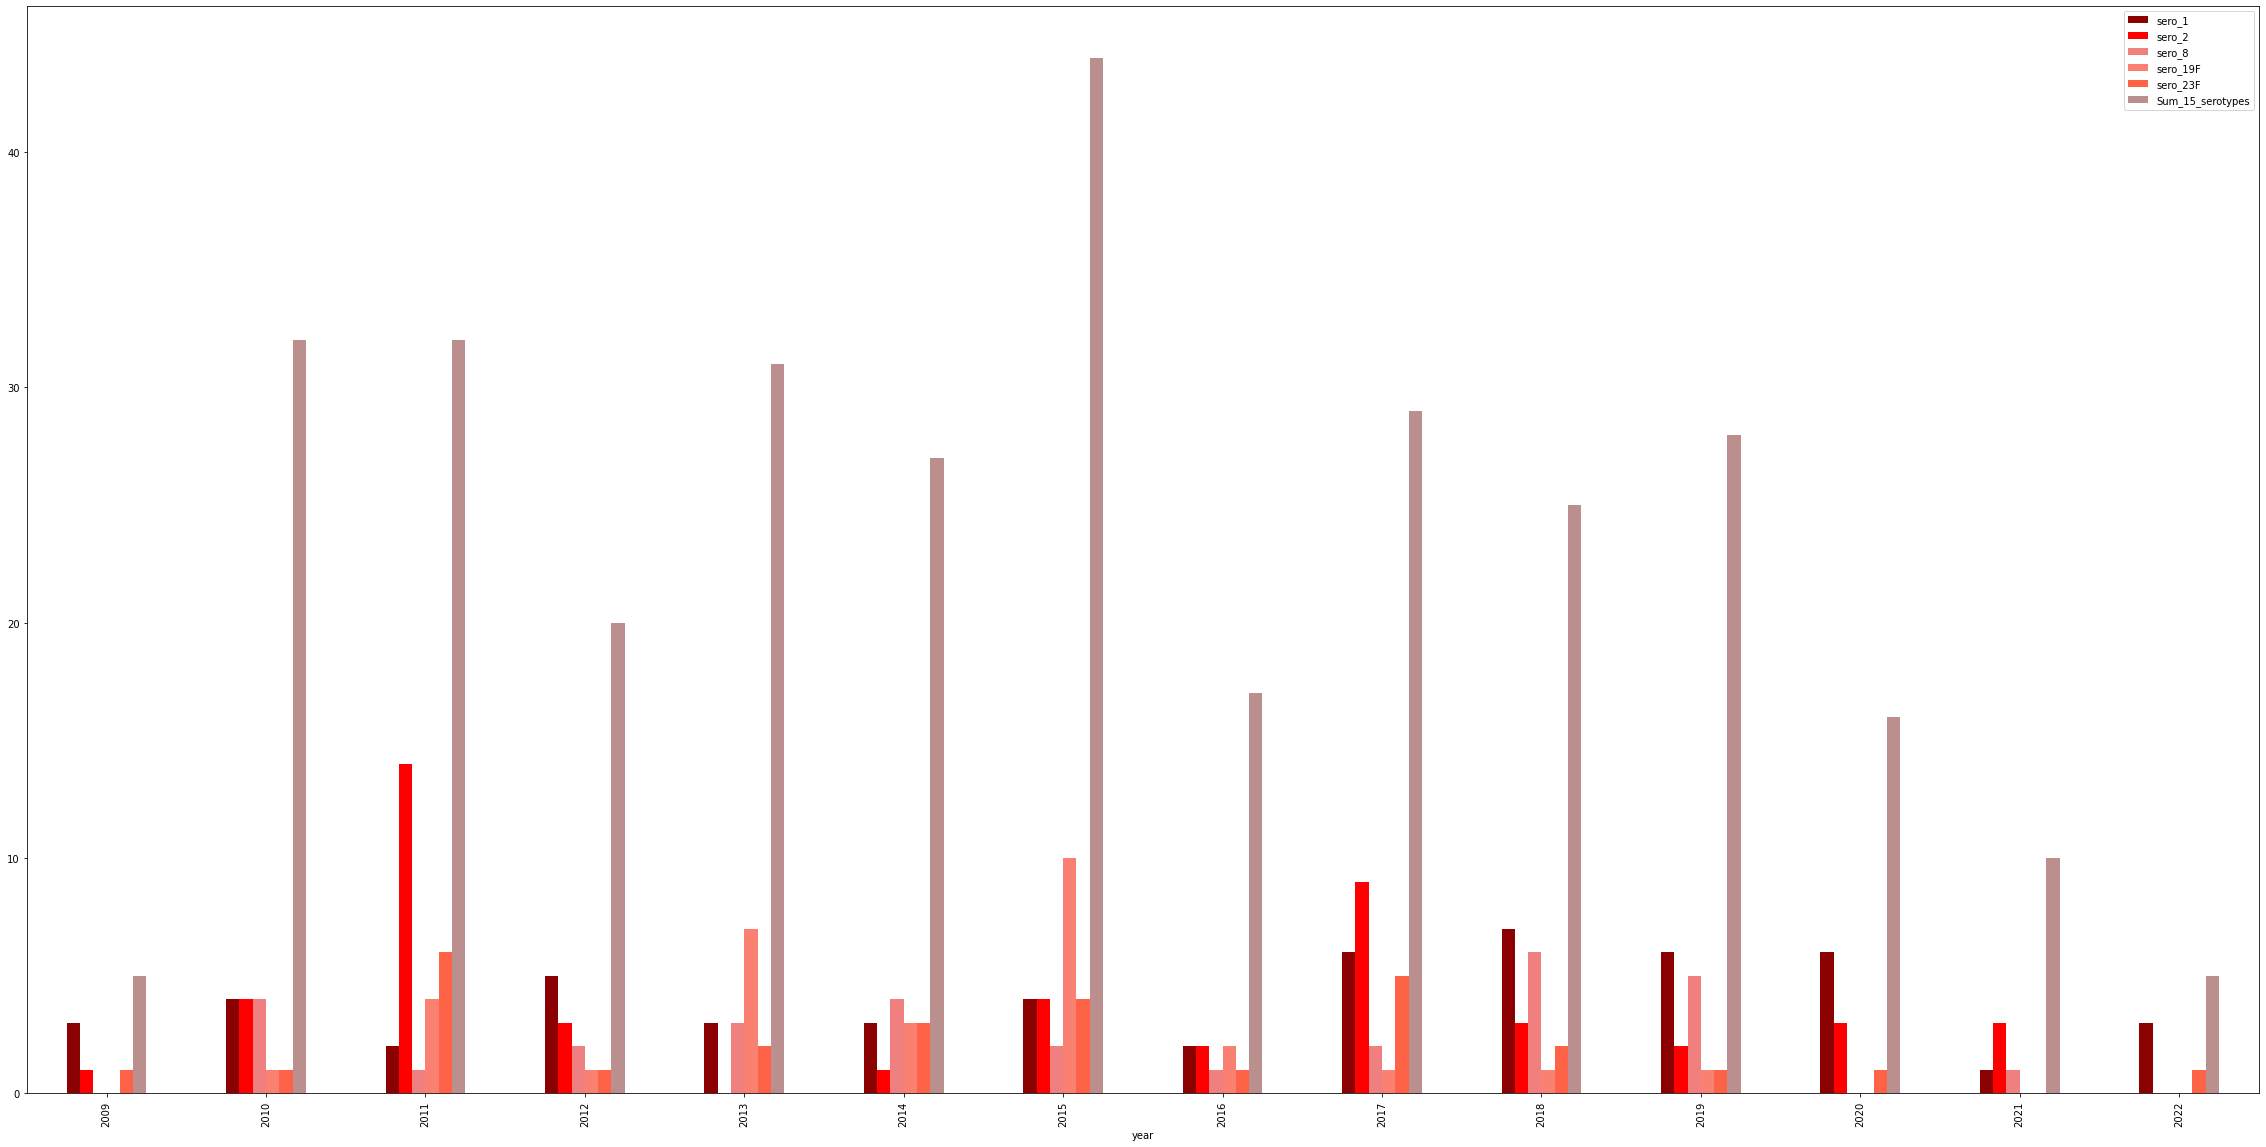

In [ ]:
df4.plot.bar(x='year', color=['darkred', 'red','lightcoral','salmon','tomato','rosybrown'])

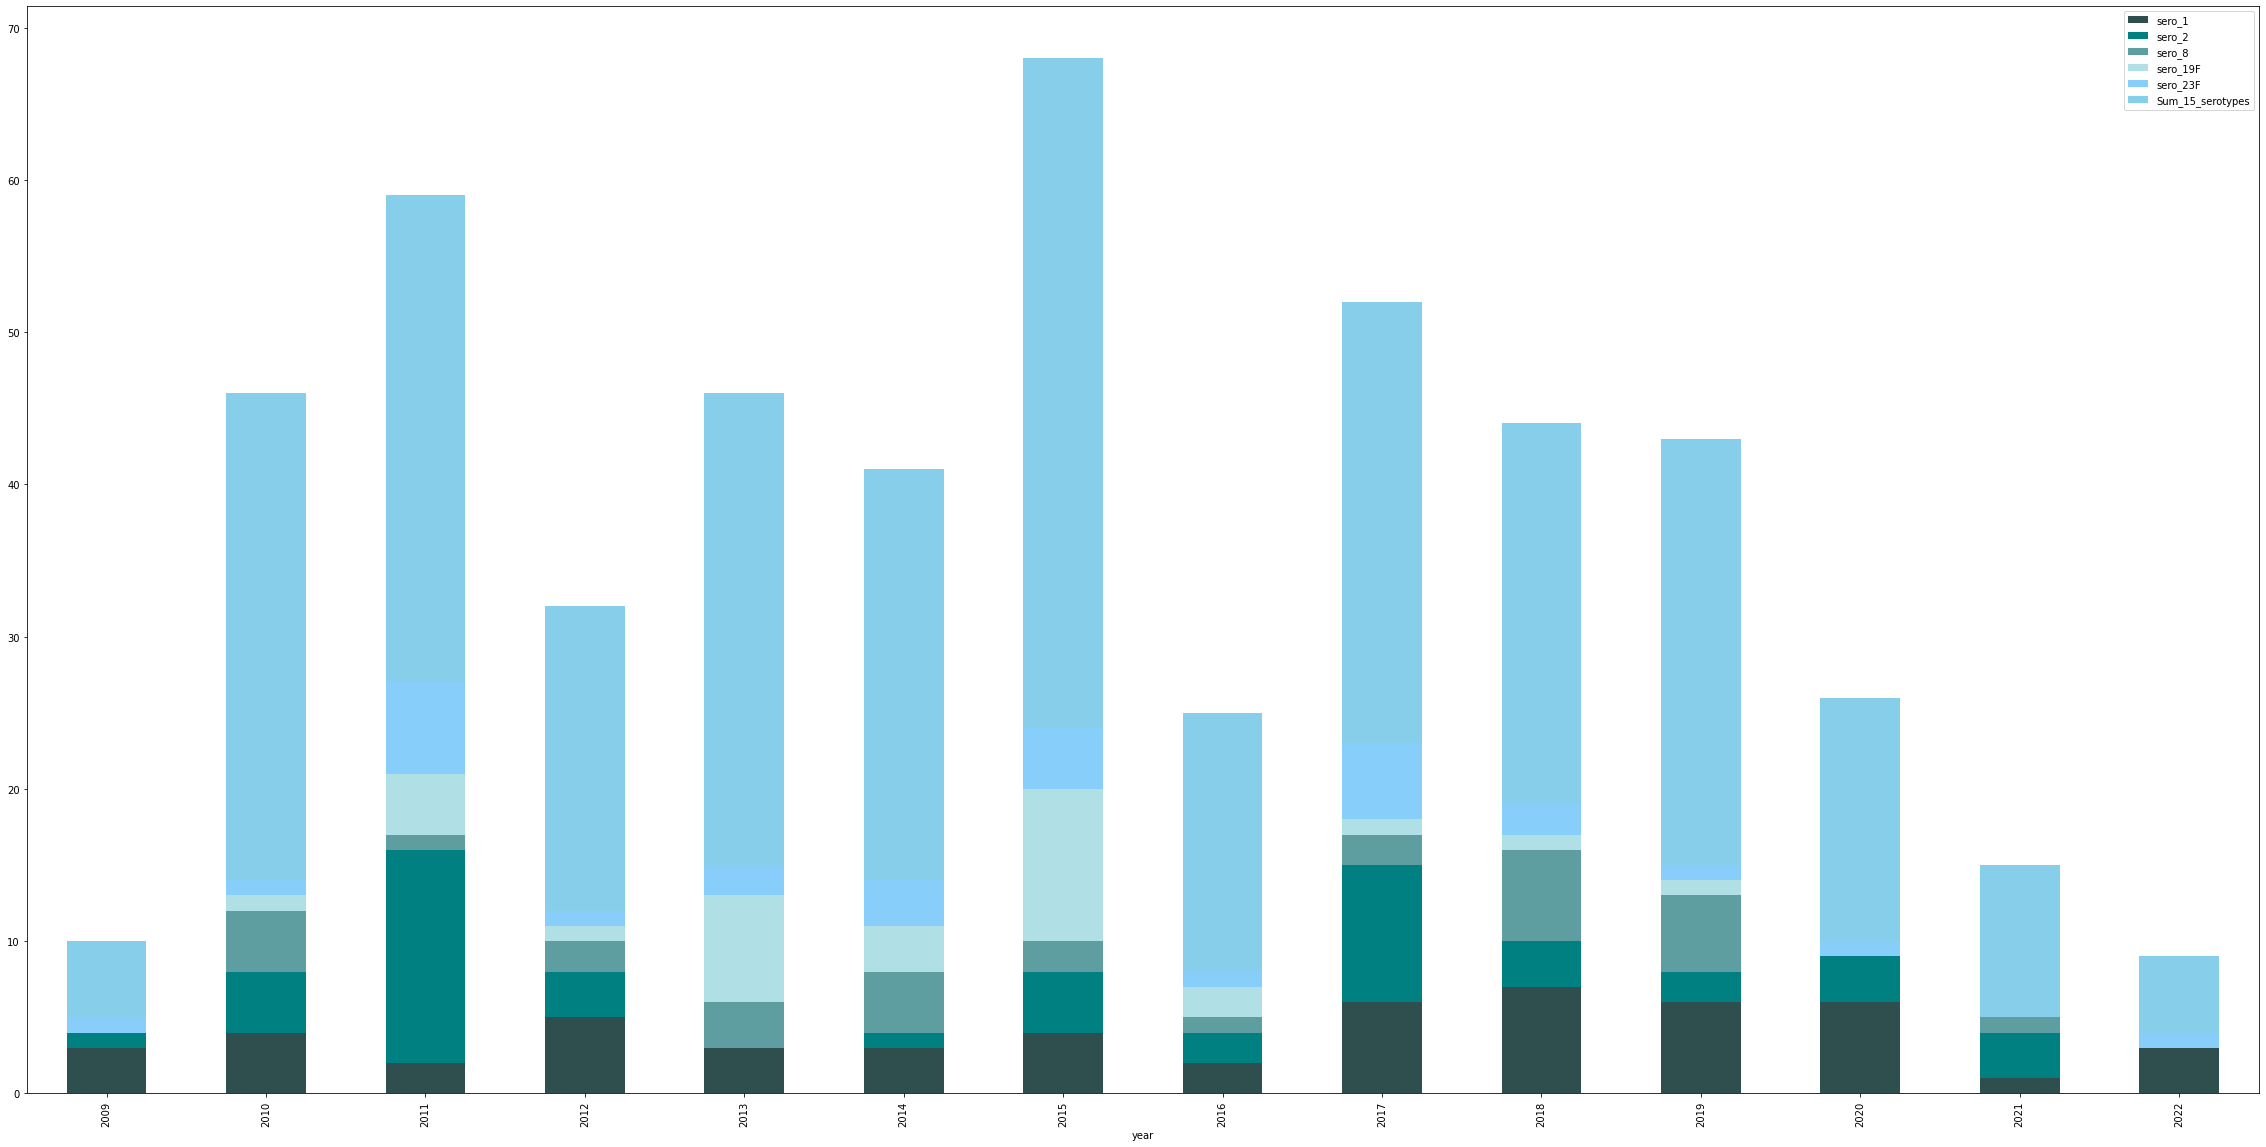

In [ ]:
df4.plot.bar(x='year',stacked=True, color=['darkslategrey', 'teal','cadetblue','powderblue','lightskyblue','skyblue'])

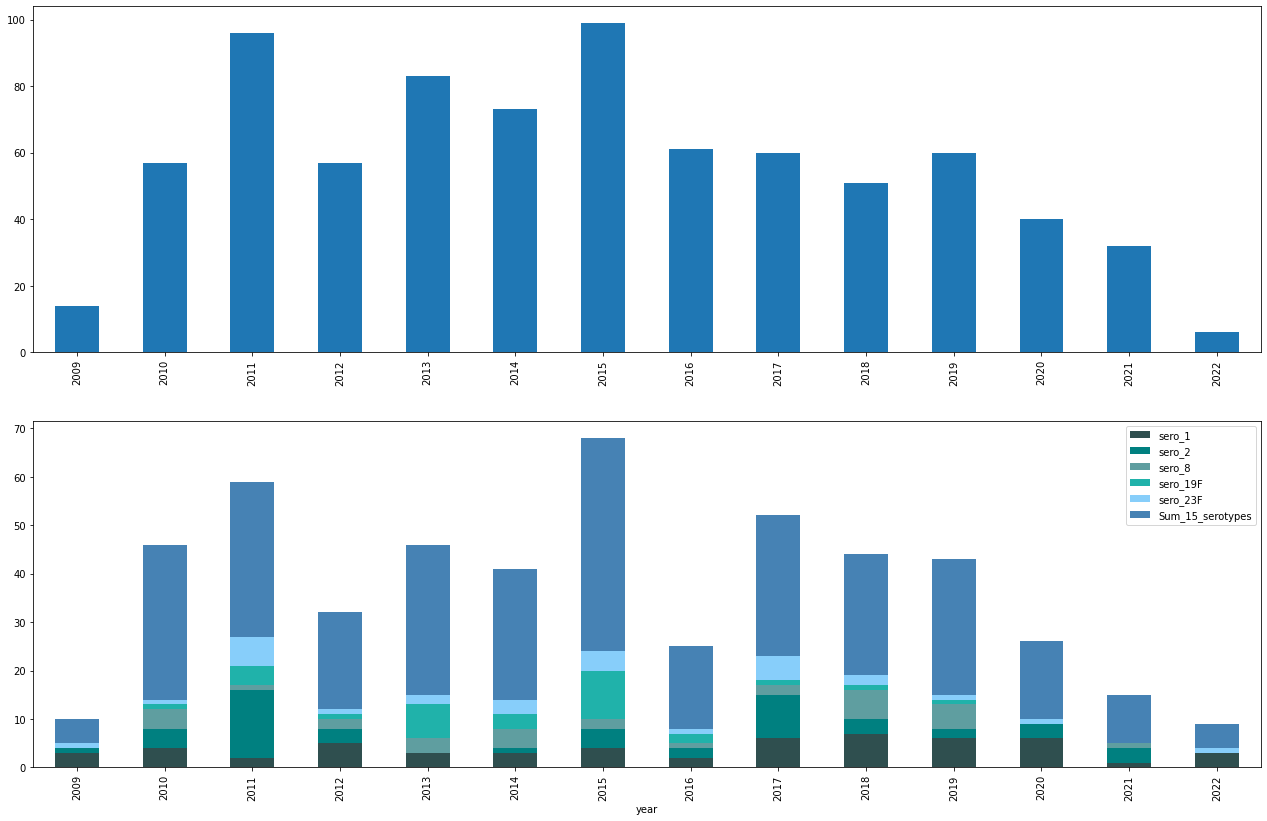

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(22, 14))
dn1= df_year['year'].value_counts().sort_index().plot(kind='bar',ax=axes[0])
dn2=df4.plot.bar(x='year',stacked=True, color=['darkslategrey', 'teal','cadetblue','lightseagreen','lightskyblue','steelblue'],ax=axes[1])